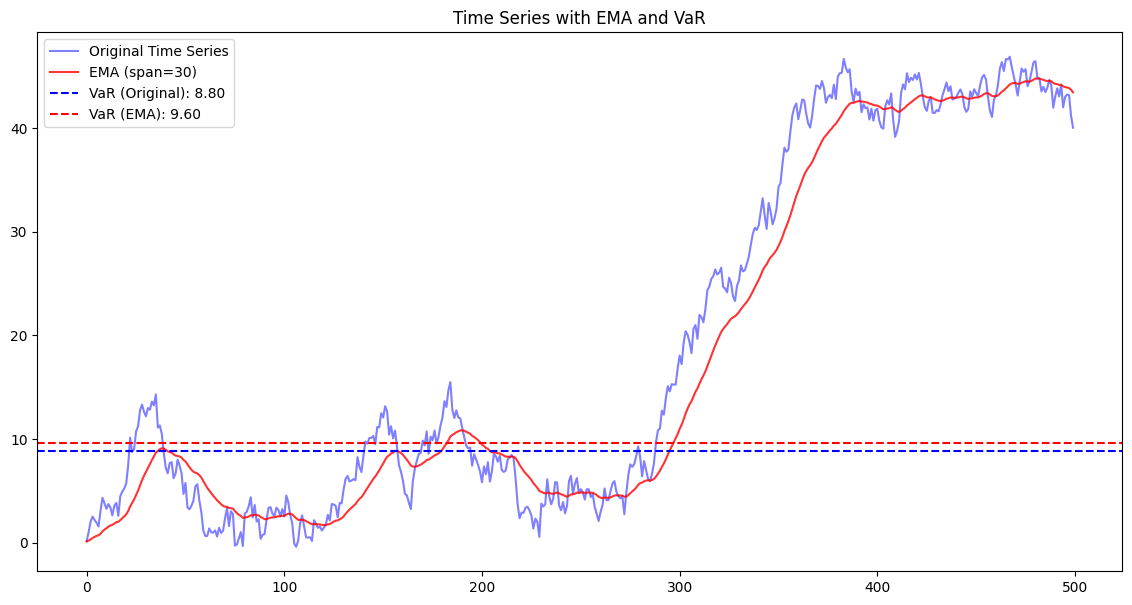

VaR (Original Time Series): 8.80
VaR (EMA Time Series): 9.60


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class EMA_DeltaNormalModel:
    def __init__(self, time_series, span=30, alpha=0.05):
        self.time_series = time_series
        self.span = span
        self.alpha = alpha
        self.ema_series = self.calculate_ema()
        self.var_original = self.calculate_var(self.time_series)
        self.var_ema = self.calculate_var(self.ema_series)

    def calculate_ema(self):
        return self.time_series.ewm(span=self.span,
                                    adjust=False).mean()

    def calculate_var(self, series):
        mean = series.mean()
        std_dev = series.std()
        z_score = np.abs(np.percentile(np.random.normal(0, 1, 10000), 100 * self.alpha))
        var = mean - z_score * std_dev
        return abs(var)

    def plot(self):
        plt.figure(figsize=(14, 7))
        plt.plot(self.time_series, label='Original Time Series', color='blue', alpha=0.5)
        plt.plot(self.ema_series, label=f'EMA (span={self.span})', color='red', alpha=0.8)
        plt.axhline(self.var_original, color='blue', linestyle='--', label=f'VaR (Original): {self.var_original:.2f}')
        plt.axhline(self.var_ema, color='red', linestyle='--', label=f'VaR (EMA): {self.var_ema:.2f}')
        plt.title('Time Series with EMA and VaR')
        plt.legend()
        plt.show()

    def print_var(self):
        print(f'VaR (Original Time Series): {self.var_original:.2f}')
        print(f'VaR (EMA Time Series): {self.var_ema:.2f}')

np.random.seed(142)

n = 500
returns = np.random.normal(0, 1, n)
time_series = pd.Series(returns).cumsum()

model = EMA_DeltaNormalModel(time_series, span=30, alpha=0.05)

model.plot()

# In kết quả VaR
model.print_var()

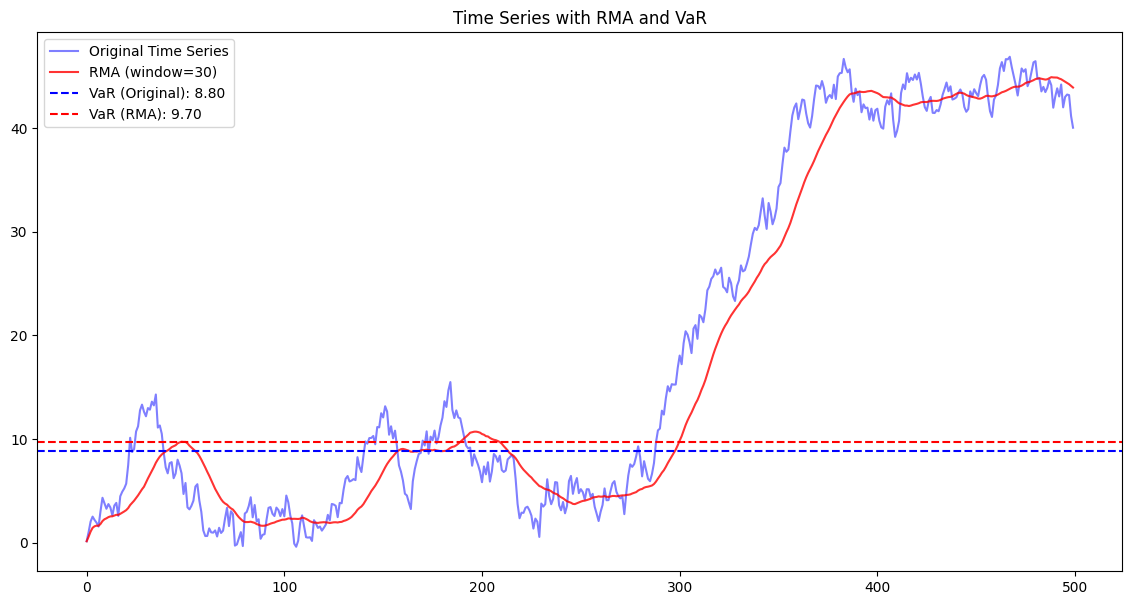

VaR (Original Time Series): 8.80
VaR (RMA Time Series): 9.70


In [6]:
class RMA_DeltaNormalModel:
    def __init__(self, time_series, window=30, alpha=0.05):
        self.time_series = time_series
        self.window = window
        self.alpha = alpha
        self.rma_series = self.calculate_rma()
        self.var_original = self.calculate_var(self.time_series)
        self.var_rma = self.calculate_var(self.rma_series)

    def calculate_rma(self):
        return self.time_series.rolling(window=self.window,
                                        min_periods=1).mean()

    def calculate_var(self, series):
        mean = series.mean()
        std_dev = series.std()
        z_score = np.abs(np.percentile(np.random.normal(0, 1, 10000), 100 * self.alpha))
        var = mean - z_score * std_dev
        return abs(var)

    def plot(self):
        plt.figure(figsize=(14, 7))
        plt.plot(self.time_series, label='Original Time Series', color='blue', alpha=0.5)
        plt.plot(self.rma_series, label=f'RMA (window={self.window})', color='red', alpha=0.8)
        plt.axhline(self.var_original, color='blue', linestyle='--', label=f'VaR (Original): {self.var_original:.2f}')
        plt.axhline(self.var_rma, color='red', linestyle='--', label=f'VaR (RMA): {self.var_rma:.2f}')
        plt.title('Time Series with RMA and VaR')
        plt.legend()
        plt.show()

    def print_var(self):
        print(f'VaR (Original Time Series): {self.var_original:.2f}')
        print(f'VaR (RMA Time Series): {self.var_rma:.2f}')


np.random.seed(142)

n = 500
returns = np.random.normal(0, 1, n)
time_series = pd.Series(returns).cumsum()

model_2_rma = RMA_DeltaNormalModel(time_series, window=30, alpha=0.05)

# Vẽ đồ thị
model_2_rma.plot()

# In kết quả VaR
model_2_rma.print_var()